<a href="https://colab.research.google.com/github/VISHNUPRIYA776/Loan_pred/blob/main/Loan_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [243]:
!pip install scikit-learn

In [244]:
import matplotlib as matplotlib
import pandas as pd
import numpy as np
from markdown_it.rules_core import inline
from sklearn.model_selection import train_test_split

df = pd.read_csv("loan_approval_dataset.csv")


In [245]:
#Display sample of the dataset
df.sample(5)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
1381,1382,5,Graduate,Yes,1500000,4900000,6,618,3400000,1000000,3200000,900000,Approved
1229,1230,4,Graduate,Yes,1800000,5800000,14,305,600000,3300000,3600000,2000000,Rejected
1504,1505,0,Graduate,No,3600000,8700000,10,309,6300000,1000000,8600000,3300000,Rejected
768,769,4,Graduate,No,5300000,15400000,8,584,5100000,1700000,14000000,5000000,Approved
269,270,5,Graduate,Yes,4200000,9400000,6,678,4700000,5500000,9900000,5700000,Approved


In [246]:
#Feature Engineering
columns_to_remove = ['loan_id']

# Remove the specified columns
df.drop(columns=columns_to_remove, inplace=True)
# Display the shape of the dataset (rows, columns) of Train dataset
print("Dataset Shape:", df.shape)
df.info()

Dataset Shape: (4269, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0    no_of_dependents          4269 non-null   int64 
 1    education                 4269 non-null   object
 2    self_employed             4269 non-null   object
 3    income_annum              4269 non-null   int64 
 4    loan_amount               4269 non-null   int64 
 5    loan_term                 4269 non-null   int64 
 6    cibil_score               4269 non-null   int64 
 7    residential_assets_value  4269 non-null   int64 
 8    commercial_assets_value   4269 non-null   int64 
 9    luxury_assets_value       4269 non-null   int64 
 10   bank_asset_value          4269 non-null   int64 
 11   loan_status               4269 non-null   object
dtypes: int64(9), object(3)
memory usage: 400.3+ KB


In [247]:
# Movable Assets
df['Movable_assets'] = df[' bank_asset_value'] + df[' luxury_assets_value']

#Immovable Assets
df['Immovable_assets'] = df[' residential_assets_value'] + df[' commercial_assets_value']


In [248]:
# Drop columns
df.drop(columns=[' bank_asset_value',' luxury_assets_value', ' residential_assets_value', ' commercial_assets_value' ], inplace=True)


def uniquevals(col):
    print(f'Unique Values in {col} is : {df[col].unique()}')


def valuecounts(col):
    print(f'Valuecounts of {col} is: {len(df[col].value_counts())}')

In [249]:
for col in df.columns:
    valuecounts(col)
    #     uniquevals(col)
    print("-" * 75)

# select all categorical data type and stored in one dataframe and select all other numarical and stored in one data frame
catvars = df.select_dtypes(include=['object']).columns
numvars = df.select_dtypes(include = ['int32','int64','float32','float64']).columns

catvars,numvars

Valuecounts of  no_of_dependents is: 6
---------------------------------------------------------------------------
Valuecounts of  education is: 2
---------------------------------------------------------------------------
Valuecounts of  self_employed is: 2
---------------------------------------------------------------------------
Valuecounts of  income_annum is: 98
---------------------------------------------------------------------------
Valuecounts of  loan_amount is: 378
---------------------------------------------------------------------------
Valuecounts of  loan_term is: 10
---------------------------------------------------------------------------
Valuecounts of  cibil_score is: 601
---------------------------------------------------------------------------
Valuecounts of  loan_status is: 2
---------------------------------------------------------------------------
Valuecounts of Movable_assets is: 484
------------------------------------------------------------------------

(Index([' education', ' self_employed', ' loan_status'], dtype='object'),
 Index([' no_of_dependents', ' income_annum', ' loan_amount', ' loan_term',
        ' cibil_score', 'Movable_assets', 'Immovable_assets'],
       dtype='object'))

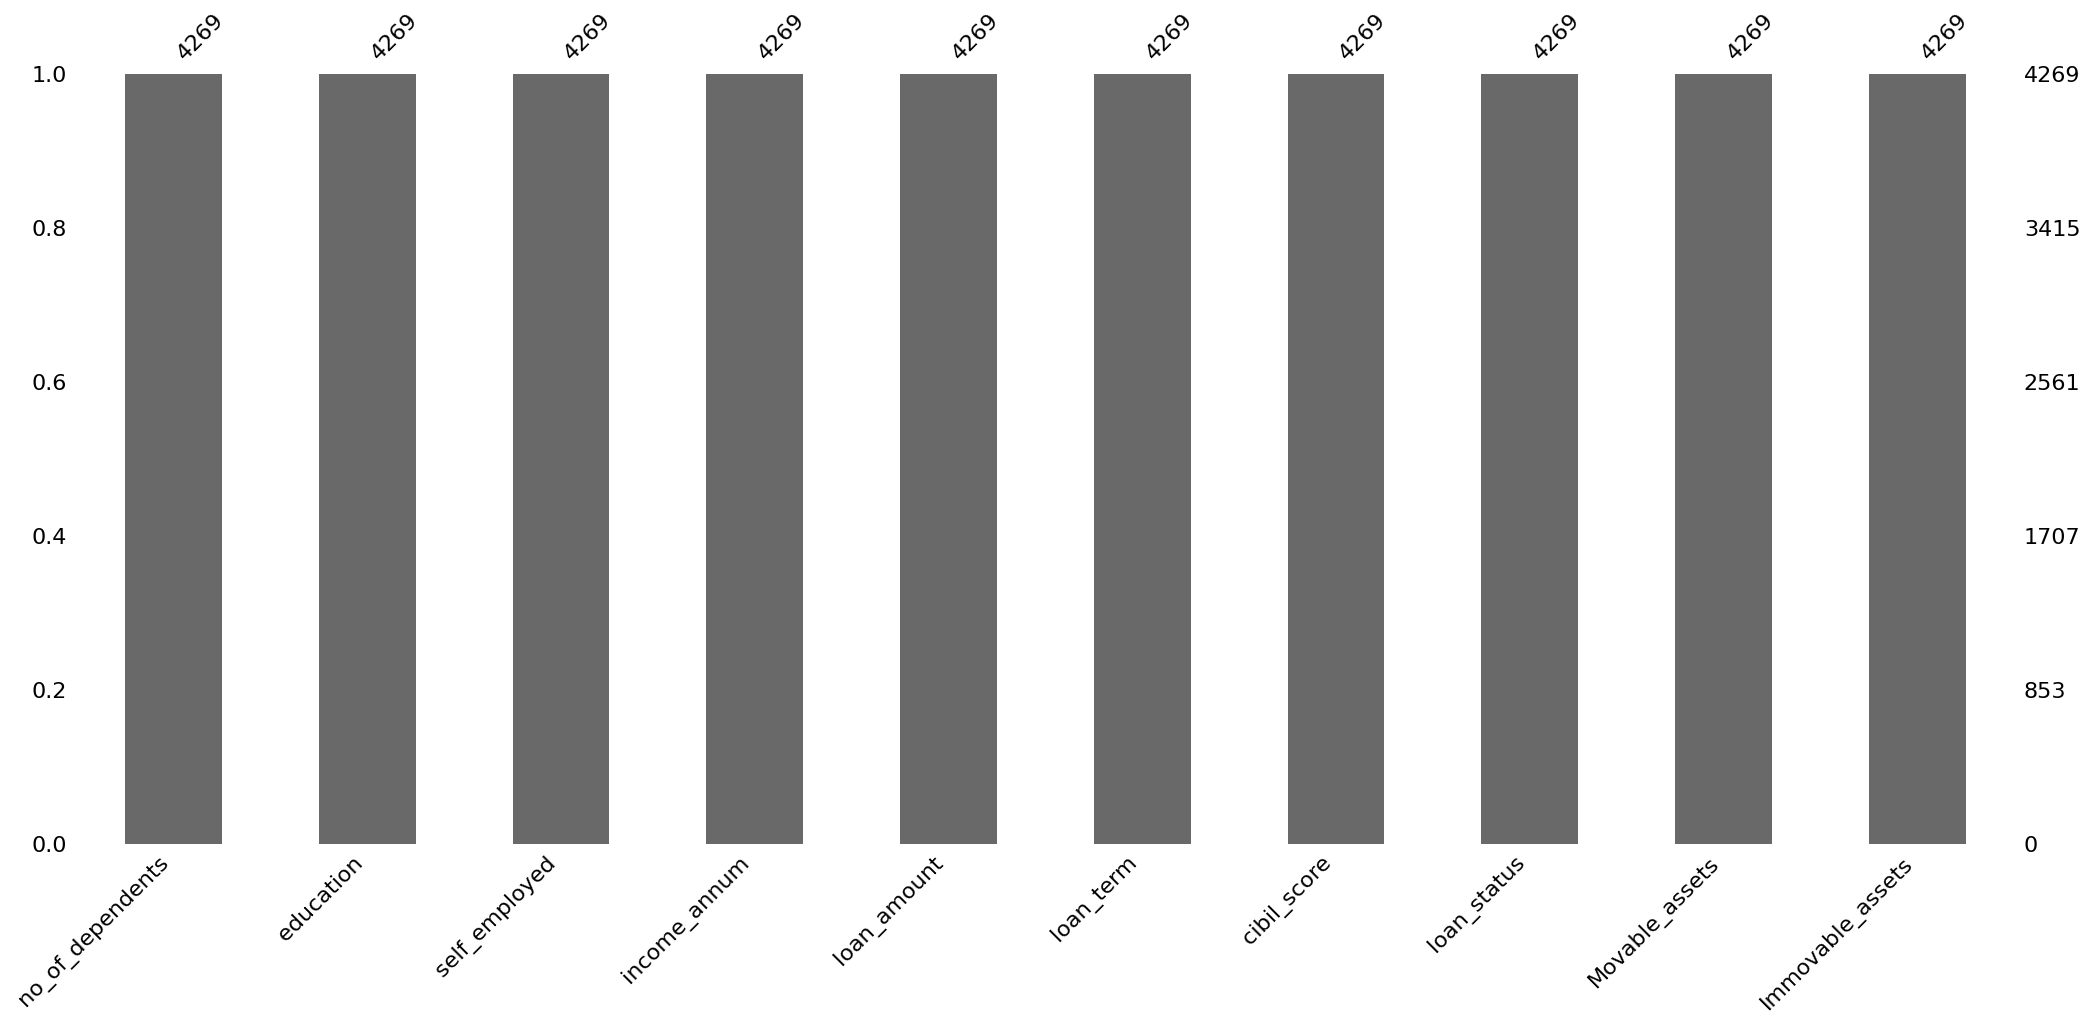

In [250]:
#Data Cleaning

import missingno as msno
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")

msno.bar(df)
'''
so on observation we can see that the null value is not present in Loan Approval Data Set dataset , as shown ↓
'''
print()

In [251]:
df.isna().sum()

df.describe()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,Movable_assets,Immovable_assets
count,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03
mean,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,2.010300e+07,1.244577e+07
std,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,1.183658e+07,9.232541e+06
min,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,3.000000e+05,-1.000000e+05
25%,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,1.000000e+07,4.900000e+06
50%,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,1.960000e+07,1.060000e+07
75%,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,2.910000e+07,1.820000e+07
max,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,5.380000e+07,4.660000e+07


In [252]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0    no_of_dependents  4269 non-null   int64 
 1    education         4269 non-null   object
 2    self_employed     4269 non-null   object
 3    income_annum      4269 non-null   int64 
 4    loan_amount       4269 non-null   int64 
 5    loan_term         4269 non-null   int64 
 6    cibil_score       4269 non-null   int64 
 7    loan_status       4269 non-null   object
 8   Movable_assets     4269 non-null   int64 
 9   Immovable_assets   4269 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 333.6+ KB


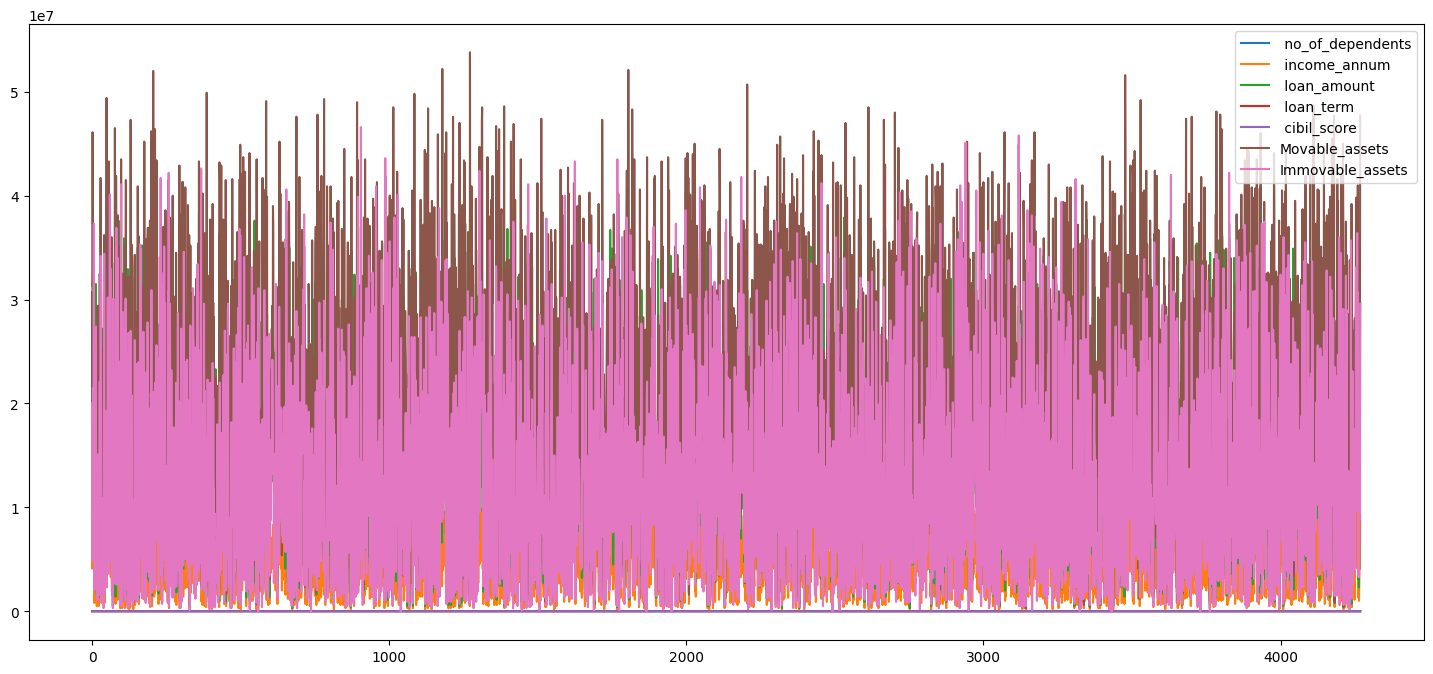

<Axes: title={'center': 'Number of Dependents'}, xlabel=' no_of_dependents', ylabel='count'>

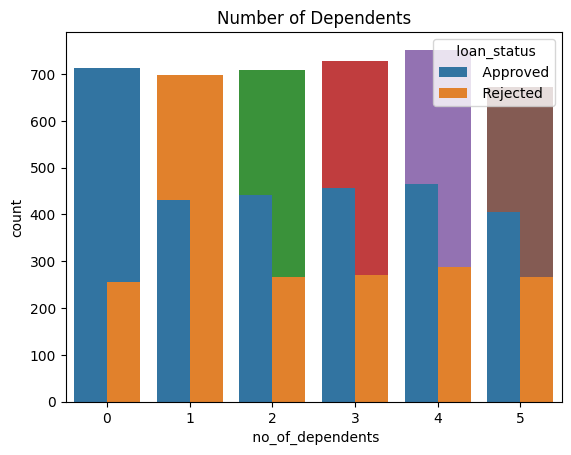

In [253]:
#Exploratory Data Analysis
import matplotlib.pyplot as plt


import seaborn as sns
# sns.set_style('dark')
df.plot(figsize=(18, 8))

plt.show()

#Number Of Dependents Distribution
sns.countplot(x = ' no_of_dependents', data = df).set_title('Number of Dependents')
#Number of Dependants Vs Loan Status
sns.countplot(x = ' no_of_dependents', data = df, hue = ' loan_status')

Text(0.5, 1.0, 'Self Employed')

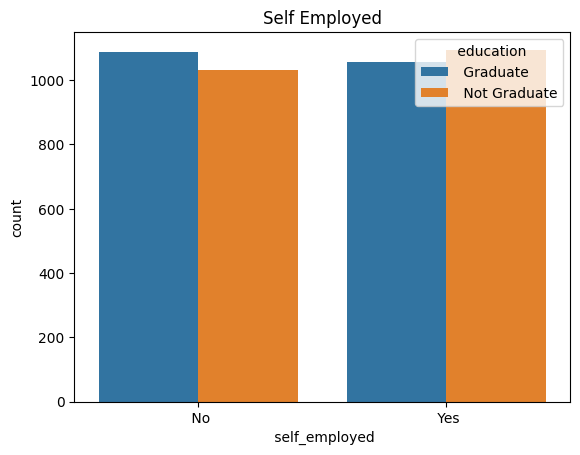

In [254]:
#Education and Self Employed
sns.countplot(x=' self_employed', data = df, hue = ' education').set_title('Self Employed')


Text(0.5, 1.0, 'Loan Status by Education')

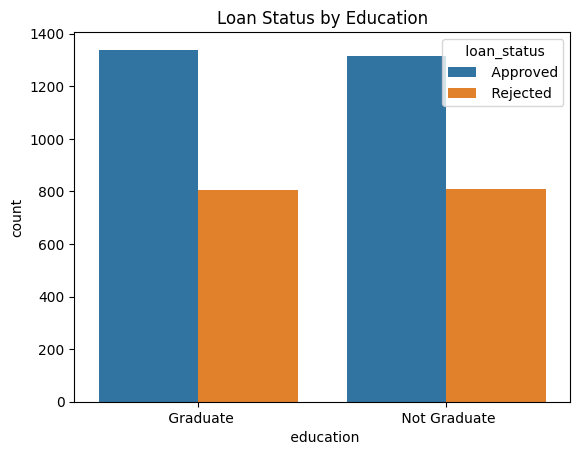

In [255]:
#Education Vs Loan Status
sns.countplot(x = ' education', hue = ' loan_status', data = df).set_title('Loan Status by Education')


,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,loan_status,Movable_assets,Immovable_assets
0,2,Graduate,No,9600000,29900000,12,778,Approved,30700000,20000000


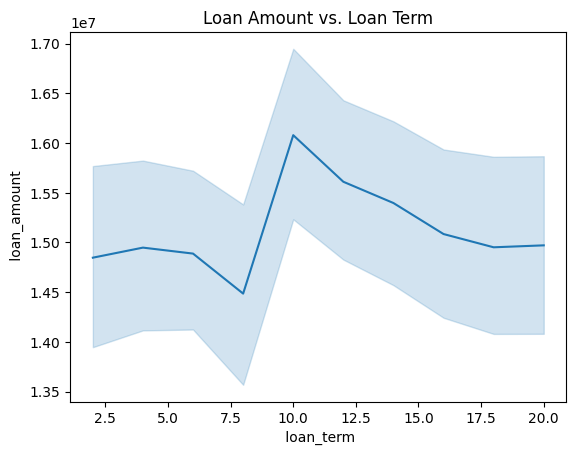

In [256]:
#Loan_Amount And Term
sns.lineplot(x = ' loan_term', y = ' loan_amount', data = df).set_title('Loan Amount vs. Loan Term')
df.head(1)


<Axes: xlabel=' loan_status', ylabel=' loan_amount'>

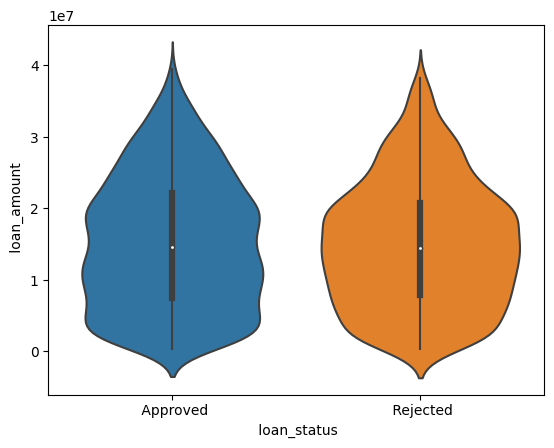

In [257]:
#Loan Amount and Loan Status
sns.violinplot(x=' loan_status', y=' loan_amount', data=df)


<Axes: xlabel=' loan_term', ylabel=' loan_amount'>

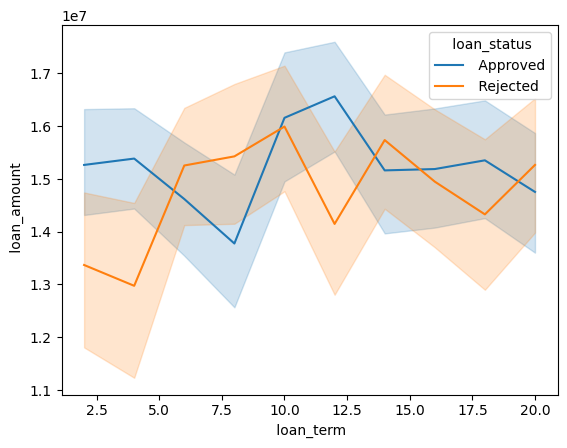

In [258]:
#Loan amount & tenure Vs Loan Status
sns.lineplot(x=' loan_term', y=' loan_amount', data=df, hue=' loan_status')


<Axes: xlabel=' cibil_score', ylabel='Count'>

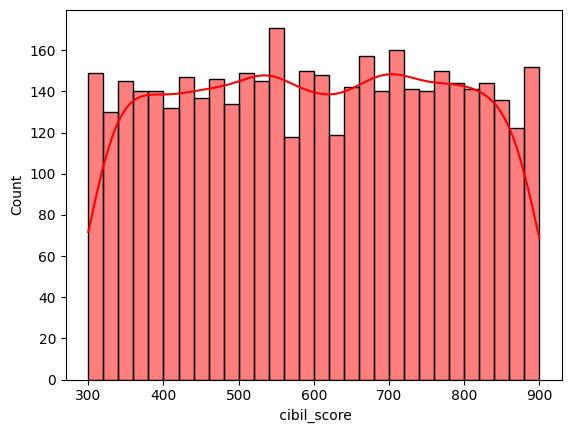

In [259]:
#CIBIL Score Distribution
# viewing the distribution of the cibil_score column
sns.histplot(df[" cibil_score"],bins=30, kde=True, color='red')


<Axes: xlabel=' loan_status', ylabel=' cibil_score'>

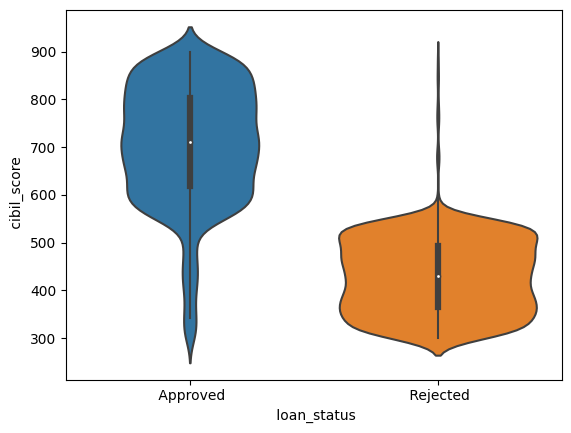

In [260]:
#CIBIL Score Vs Loan Status
sns.violinplot(x=' loan_status', y=' cibil_score', data=df)

Text(0.5, 1.0, 'Immovable_assets ')

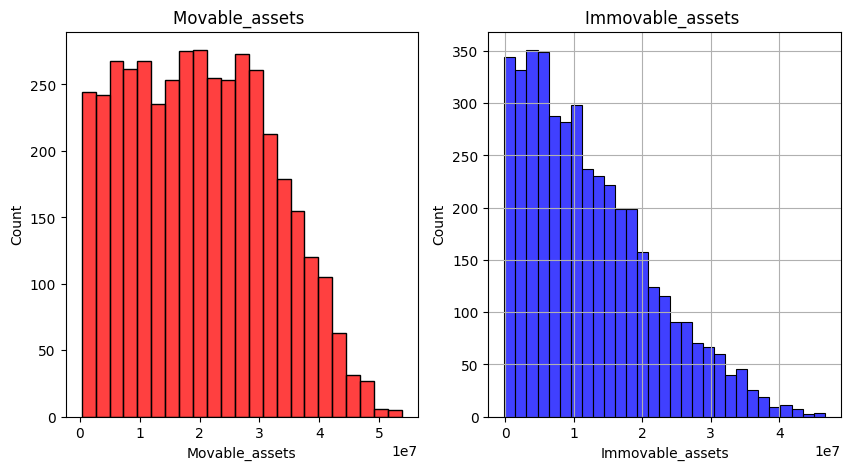

In [261]:
#Asset Distribution
fig, ax = plt.subplots(1,2,figsize=(10,5))
plt.subplot(1, 2, 1)
sns.histplot(df['Movable_assets'], ax=ax[0], color='red')
plt.title("Movable_assets ")

plt.subplot(1, 2, 2)
plt.grid()
sns.histplot(df['Immovable_assets'], ax=ax[1], color='blue')
plt.title("Immovable_assets ")


<Axes: xlabel='Immovable_assets', ylabel='Count'>

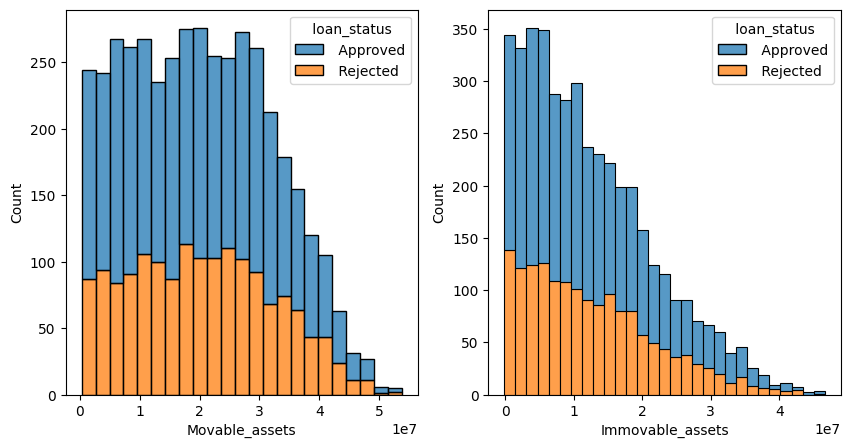

In [262]:
#Assets Vs Loan Status
fig, ax = plt.subplots(1,2,figsize=(10,5))
sns.histplot(x  = 'Movable_assets', data = df, ax=ax[0], hue = ' loan_status', multiple='stack')
sns.histplot(x =  'Immovable_assets', data = df, ax=ax[1], hue  = ' loan_status', multiple='stack')


In [263]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,loan_status,Movable_assets,Immovable_assets
0,2,Graduate,No,9600000,29900000,12,778,Approved,30700000,20000000
1,0,Not Graduate,Yes,4100000,12200000,8,417,Rejected,12100000,4900000
2,3,Graduate,No,9100000,29700000,20,506,Rejected,46100000,11600000
3,3,Graduate,No,8200000,30700000,8,467,Rejected,31200000,21500000
4,5,Not Graduate,Yes,9800000,24200000,20,382,Rejected,34400000,20600000


In [264]:
#Data Preprocessing

##Label Encoding the categorical variables
# Label Encoding
df[' education'] = df[' education'].map({' Not Graduate':0, ' Graduate':1})
df[' self_employed'] = df[' self_employed'].map({' No':0, ' Yes':1})
df[' loan_status'] = df[' loan_status'].map({' Rejected':0, ' Approved':1})

df.head()


,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,loan_status,Movable_assets,Immovable_assets
0,2,1,0,9600000,29900000,12,778,1,30700000,20000000
1,0,0,1,4100000,12200000,8,417,0,12100000,4900000
2,3,1,0,9100000,29700000,20,506,0,46100000,11600000
3,3,1,0,8200000,30700000,8,467,0,31200000,21500000
4,5,0,1,9800000,24200000,20,382,0,34400000,20600000


In [265]:
#Machine Learning Model Decision
##from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn import tree

##Train Test Split
X_train, X_test, y_train, y_test = train_test_split(df.drop(' loan_status', axis=1), df[' loan_status'], test_size=0.3, random_state=42)

In [266]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

lgr = LogisticRegression()

lgr.fit(X_train, y_train)

predictions_for_lgr= lgr.predict(X_test)

# Calculate accuracy
accuracy_lgr = accuracy_score(y_test, predictions_for_lgr)
print("Accuracy of Logistic Regression:", accuracy_lgr)

Accuracy of Logistic Regression: 0.726775956284153


In [267]:
#Support Vector Classification (SVC)
from sklearn.svm import SVC
model = SVC()

model.fit(X_train, y_train)

predictions_for_svc = model.predict(X_test)

# Calculate accuracy
accuracy_svc = accuracy_score(y_test, predictions_for_svc)
print("Accuracy of SVC:", accuracy_svc)

Accuracy of SVC: 0.6323185011709602


In [268]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

# Create decision tree object
dtree = DecisionTreeClassifier()
# Training the model using the training data
dtree.fit(X_train, y_train)
dtree_pred = dtree.predict(X_test)
# Training Accuracy
dtree.score(X_train, y_train)
# Calculate accuracy
accuracy_decision_tree = accuracy_score(y_test, dtree_pred)
print("Accuracy of Decision tree:", accuracy_decision_tree)

Accuracy of Decision tree: 0.9804839968774395


In [272]:
# Store accuracies in a dictionary
test_results = {
    'Model': ['Logistic Regression', 'SVC', 'Decision Tree'],
    'Accuracy': [accuracy_lgr, accuracy_svc, accuracy_decision_tree]
}

# Create a DataFrame
results_df = pd.DataFrame(test_results)

# Display the results
print(results_df)

                 Model  Accuracy
0  Logistic Regression  0.726776
1                  SVC  0.632319
2        Decision Tree  0.980484


In [269]:
if best_accuracy == accuracy_lgr:
    print("Logistic Regression has the best accuracy.")
    best_model = lgr
elif best_accuracy == accuracy_svc:
    print("SVC has the best accuracy.")
    best_model = svc
else:
    print("Decision tree has the best accuracy.")
    best_model = dtree

Decision tree has the best accuracy.


In [270]:
print(best_model)

DecisionTreeClassifier()


In [278]:
from sklearn.impute import SimpleImputer  # Importing SimpleImputer
import pandas as pd

# New data with feature names aligned to the training data
X_new = pd.DataFrame({
    'no_of_dependents': [2],
    'education': ['Not Graduate'],
    'self_employed': ['No'],
    'income_annum': [60000],
    'loan_amount': [20000],
    'loan_tenure': [5],
    'cibil_score': [750],
    'residential_asset_value': [150000],
    'commercial_asset_value': [50000],
    'luxury_asset_value': [10000],
})

# Define columns to match X_train
columns_to_match = X_train.columns

# Reindexing X_new to align columns with X_train
X_new = X_new.reindex(columns=columns_to_match)

pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('best_model', best_model)
])

pipeline.fit(X_train, y_train)

predictions = pipeline.predict(X_new)
# Mapping predicted values to labels
predicted_label = 'Approved' if predictions[0] == 1 else 'Rejected'

# Printing the predicted value
print(f"Prediction: {predicted_label}")



Prediction: Approved
